## Chapter05 이산형 확률변수

## 5.1      1차원 이산형 확률변수

- X: 확률변수 
- 확률변수X가 xk라는 값을 취하는 확률: P(X=x_k) = p_k

#### 확률질량함수(PMF)

- "확률"을 변수가 취할 수 있는 값 x를 인수로 하는 함수로 볼 수 있기 때문에 f(x) = P(X=x) 로 표현
- 확률=f(x) 로 생각할 수 있고, 이를 확률질량함수(PMF, probability mass function) 또는 "확률함수" 라고 부릅니다. 
- 확률변수의 확률분포가 결정되면, 그 확률변수의 움직임이 정해집니다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

x_set = np.array([1, 2, 3, 4, 5, 6])
# def f(x):
#     return 1/6

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
    
X = [x_set, f]
print(X)

[array([1, 2, 3, 4, 5, 6]), <function f at 0x000001C597BFF8B0>]


In [2]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

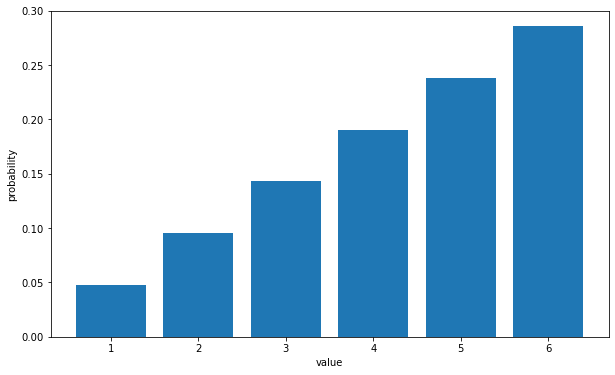

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [4]:
np.all(prob >= 0)

True

In [5]:
np.sum(prob)

0.9999999999999999

#### 누적분포함수(CDF)

- 확률변수X가 x이하가 될 때의 확률을 반환하는 함수로도 자주 사용.
- 함수F(x)를 누적분포함수(cumulative distribution function, CDF)또는 간단히 "분포함수"라고 부릅니다. 
- F(x) = P(X<=x) = sum(f(x_k))

In [6]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
F(3)

0.2857142857142857

#### 확률변수의 변환 
- 확률변수를 표준화(평균을 빼고 표준편차를 나누는 것)-> 확률변수로 다시 이용 


In [7]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

## 1차원 이산형 확률변수의 지표

### 확률변수의 평균 (=기대값, expected value)
- "주사위라면 무한 번 주사위를 굴려 얻는 눈의 평균"
- $E(X)=\sum_{k} x_k f(x_K)$

In [8]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [9]:
# 주사위 100만번 시행 
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334807

#### 변환한 확률변수의 평균(=기대값)
- $E(g(X))=\sum_{k} g(x_k) f(x_K) $

- $E(Y)=E(2x+3)=\sum_{k} (2x_k+3) f(x_K) $

In [10]:
# g에 아무것도 지정하지 않으면, 확률변수X의 기대값이 구해집니다. 
# g에 아무것도 안들어가면 lambda로 대체.
def E(X,g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])
E(X)

4.333333333333333

#### 기대값의 선형성 
- E(aX+b) = aE(X) + b

In [11]:
E(X, g=lambda x:2*x+3)

11.666666666666664

In [12]:
2 * E(X) + 3

11.666666666666666

### 분산
- $V(X)=\sigma^2=\sum_{k} (x_k-\mu)^2f(x_k)   $


In [13]:
mean = E(X)
np.sum([(x_k-mean)**2*f(x_k) for x_k in x_set])

2.2222222222222223

In [14]:
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])
V(X)

2.2222222222222223

#### 분산의 공식
- $V(aX+b)=a^2V(X)   $

In [15]:
V(X, lambda x: 2*x+3)

8.88888888888889

In [16]:
2**2*V(X)

8.88888888888889